In [1]:
!pip install pyspark

In [2]:
import pyspark
from pyspark.sql import SparkSession, SQLContext, Row
from datetime import datetime
import pytz               ## allows for timezone manipulation in datetime
from pyspark.sql.types import TimestampType

In [3]:
sc = pyspark.SparkContext('local[*]')

In [4]:
spark = SparkSession.builder.master("local").appName("Group_4_Project").config("spark.some.config.option","some-value").getOrCreate()

Create two Data Frames with our two data sets.

In [65]:
# inferSchema is needed to differentiate between datatypes.  
# Without it all of the types are created as Strings.
df_weather = spark.read.csv('weather_features.csv',inferSchema=True, header=True)
df_energy = spark.read.csv('energy_dataset.csv', inferSchema=True, header=True)

In [ ]:
df_weather.select('dt_iso').show(1)

Attempting to get rid of Datetime as Strings and replace with datetime as type datetime.

In [6]:
dt = datetime.strptime('2015-01-01 00:00:00+01:00', '%Y-%m-%d %H:%M:%S%z')
print("New date time object: ", dt)
print("Is now type: ", type(dt))
print('The month is: ', dt.month)

# Grab all of dt_iso and store into a string
newlist = df_weather.select('dt_iso').rdd.map(lambda x: x).collect()
print('New list is type: ', type(newlist), " With item types: ", type(newlist[0]))

# Convert the list from type string to type datetime.datetime
newlistlength = len(newlist)
for i in range(newlistlength):
  obj = newlist[i].dt_iso
  dt = datetime.strptime(obj, '%Y-%m-%d %H:%M:%S%z')
  newlist[i] = dt

print(newlist[0])

print('New list is type: ', type(newlist), " With item types: ", type(newlist[0]))

New date time object:  2015-01-01 00:00:00+01:00
Is now type:  <class 'datetime.datetime'>
The month is:  1
New list is type:  <class 'list'>  With item types:  <class 'pyspark.sql.types.Row'>
2015-01-01 00:00:00+01:00
New list is type:  <class 'list'>  With item types:  <class 'datetime.datetime'>


Probably Drop this next bit.  Not using it here.

In [ ]:
sc = spark.sparkContext
rdd = sc.parallelize(newlist)
row_rdd = rdd.map(lambda x: Row(x))

#print(row_rdd.take(10))
#new_column = ['dt_iso']
#df_new = rdd.toDF(new_column)


df_temp_time = spark.createDataFrame(newlist)
df_temp_time.count()
df_temp_time.show(10)
df_temp_time.dtypes

Just want to print the types of the DF's for reference

In [70]:
df_weather.select('dt_iso').show(10)
df_energy.dtypes

+--------------------+
|              dt_iso|
+--------------------+
|2015-01-01 00:00:...|
|2015-01-01 01:00:...|
|2015-01-01 02:00:...|
|2015-01-01 03:00:...|
|2015-01-01 04:00:...|
|2015-01-01 05:00:...|
|2015-01-01 06:00:...|
|2015-01-01 07:00:...|
|2015-01-01 08:00:...|
|2015-01-01 09:00:...|
+--------------------+
only showing top 10 rows



[('time', 'string'),
 ('generation biomass', 'double'),
 ('generation fossil brown coal/lignite', 'double'),
 ('generation fossil coal-derived gas', 'double'),
 ('generation fossil gas', 'double'),
 ('generation fossil hard coal', 'double'),
 ('generation fossil oil', 'double'),
 ('generation fossil oil shale', 'double'),
 ('generation fossil peat', 'double'),
 ('generation geothermal', 'double'),
 ('generation hydro pumped storage aggregated', 'string'),
 ('generation hydro pumped storage consumption', 'double'),
 ('generation hydro run-of-river and poundage', 'double'),
 ('generation hydro water reservoir', 'double'),
 ('generation marine', 'double'),
 ('generation nuclear', 'double'),
 ('generation other', 'double'),
 ('generation other renewable', 'double'),
 ('generation solar', 'double'),
 ('generation waste', 'double'),
 ('generation wind offshore', 'double'),
 ('generation wind onshore', 'double'),
 ('forecast solar day ahead', 'double'),
 ('forecast wind offshore eday ahead', 

In [67]:
df_weather.dtypes

[('dt_iso', 'string'),
 ('city_name', 'string'),
 ('temp', 'double'),
 ('temp_min', 'double'),
 ('temp_max', 'double'),
 ('pressure', 'int'),
 ('humidity', 'int'),
 ('wind_speed', 'int'),
 ('wind_deg', 'int'),
 ('rain_1h', 'double'),
 ('rain_3h', 'double'),
 ('snow_3h', 'double'),
 ('clouds_all', 'int'),
 ('weather_id', 'int'),
 ('weather_main', 'string'),
 ('weather_description', 'string'),
 ('weather_icon', 'string')]

Attempts at Graphing

In [75]:
import numpy as np                          ## For scientific computing operations
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from array import array 

Join our two datasets on dt_iso and time

In [68]:
df_e = df_energy.alias('df_e')
df_w = df_weather.alias('df_w')

df_energy_weather = df_w.join(df_e, df_w.dt_iso == df_e.time, 'inner')

Try to isolate the total energy load actual for Madrid in January of 2015 and then plot it with matplotlib.pyplot as plt.

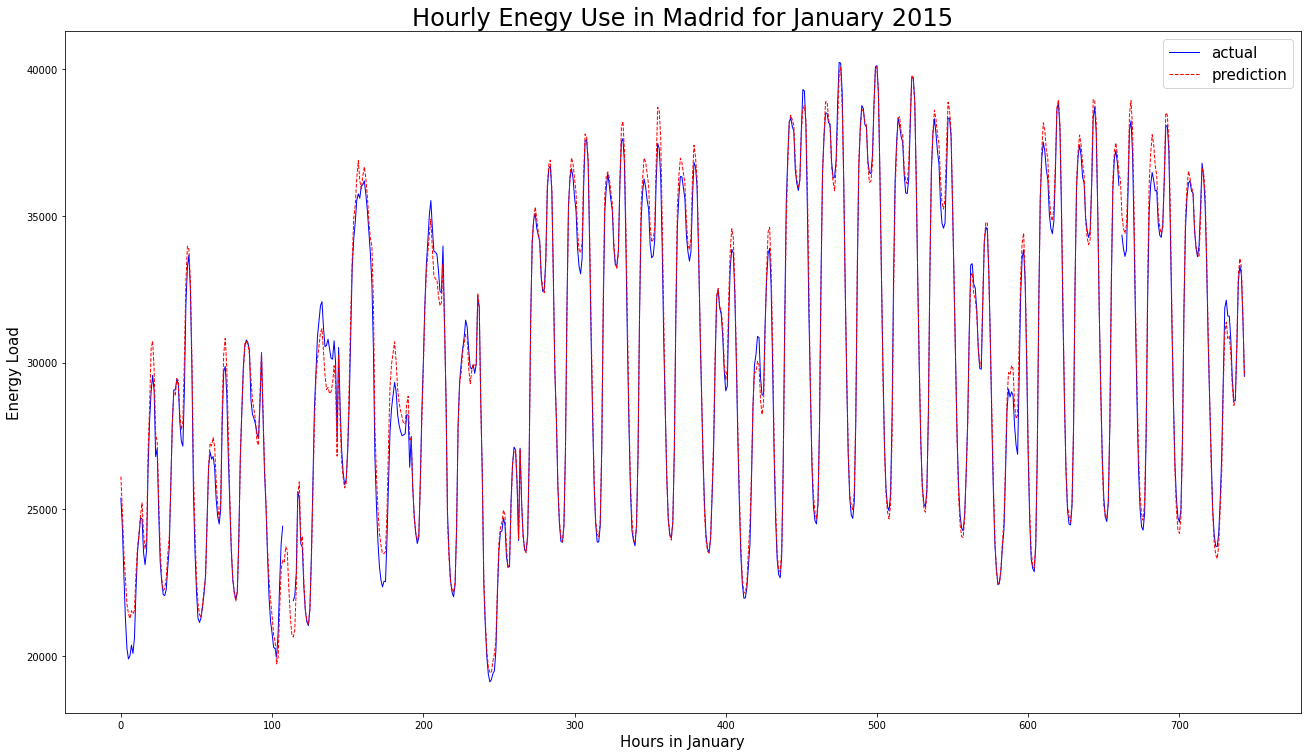

In [96]:
#collect the data from one column 
#timelist = df_energy_weather.select("time").collectAsList()

# Get Madrid's actual power usage and time for the month of January 2015
df_madrid_total_load = df_energy_weather.select("total load actual", "dt_iso", "total load forecast") \
                                        .filter((df_w.city_name == 'Madrid') \
                                        & (df_w.dt_iso.like('2015-01%')))

# Convert the data in the new DF to values in a list for future graph plot.
madrid_january_energy = list(df_madrid_total_load.select('total load actual').toPandas()['total load actual'])

# Turn the list into an array that plt.plot() will accept 
# *******NOT NEEDED DELETE LATER***********************
mad_en_arr = array('f')
for i in range(len(madrid_january_energy)):
  mad_en_arr.append(madrid_january_energy[i])

# Convert the data in the new DF to values in a list for future graph plot.
madrid_january_forecast = list(df_madrid_total_load.select('total load forecast').toPandas()['total load forecast'])

# Turn the list into an array that plt.plot() will accept 
# *******NOT NEEDED DELETE LATER***********************
mad_en_arr_fore = array('f')
for i in range(len(madrid_january_forecast)):
  mad_en_arr_fore.append(madrid_january_forecast[i])

# OR move the data into an array with numpy stuff ********THIS DIDNT WORK*********
#madrid_energy_array = np.array(df_madrid_total_load.select('total load actual').collect())
#madrid_energy_array = np.array(madrid_january_energy, dtype='double')
#mad_jan_lst = madrid_energy_array.tolist()

# Convert the data in the new DF to values in a list for future graph plot.
madrid_january_time = list(df_madrid_total_load.select('dt_iso').toPandas()['dt_iso'])

## Get the number of hours available.  Not sure this is necessary
mad_w_arr = array('I')
for i in range(len(madrid_january_time)):
  mad_w_arr.append(i)

# OR move the data into an array with numpy stuff 
# ***************DELETE THIS LATER*******************************
madrid_time_array = np.array(df_madrid_total_load.select('dt_iso').collect())

plt.figure(figsize=(18,10))              ## Figure(figsize) changes the size of the output graph
plt.plot(mad_w_arr, madrid_january_energy, 'b-', linewidth=1, markersize=12, label='actual')  ## Plot the actual energy use
plt.plot(mad_w_arr, madrid_january_forecast, 'r--', linewidth=1, markersize=12, label='prediction')  ## Plot the forecast energy use
plt.tight_layout()
plt.title('Hourly Enegy Use in Madrid for January 2015', size=24)
plt.ylabel('Energy Load', size=15)
plt.xlabel('Hours in January', size=15)
plt.legend(fontsize=15)
plt.show()

Try to work with error of forecasts 

<class 'numpy.float64'>


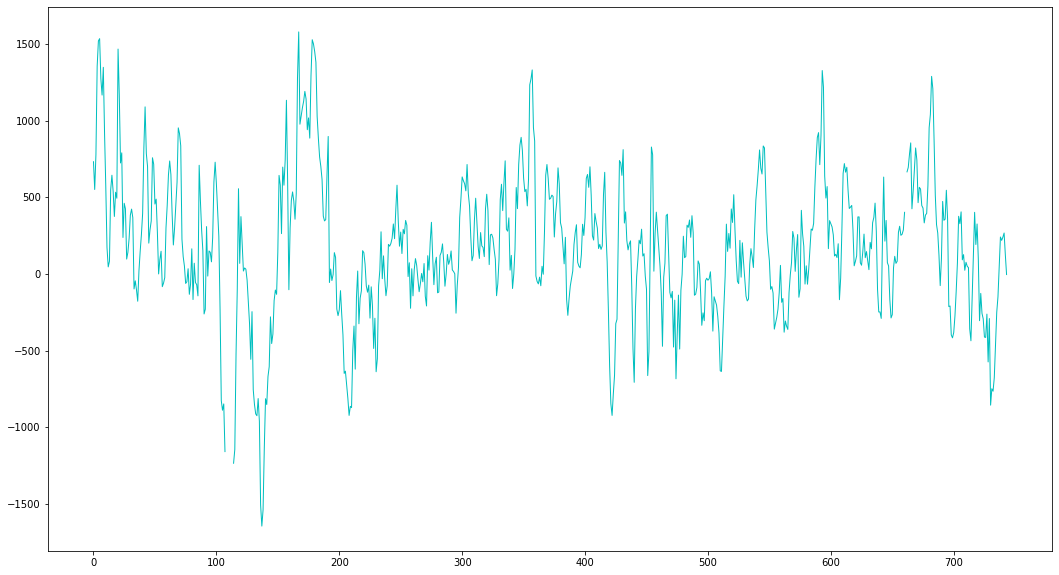

In [102]:
act_arr = np.array(madrid_january_energy)
fore_arr = np.array(madrid_january_forecast)

forecast_error = np.subtract(fore_arr, act_arr)
plt.figure(figsize=(18,10))
plt.plot(mad_w_arr, forecast_error, 'c-', linewidth=1, markersize=12, label='prediction')

print(type(forecast_error[0]))

Just a little more of the same but with days in January not hours.

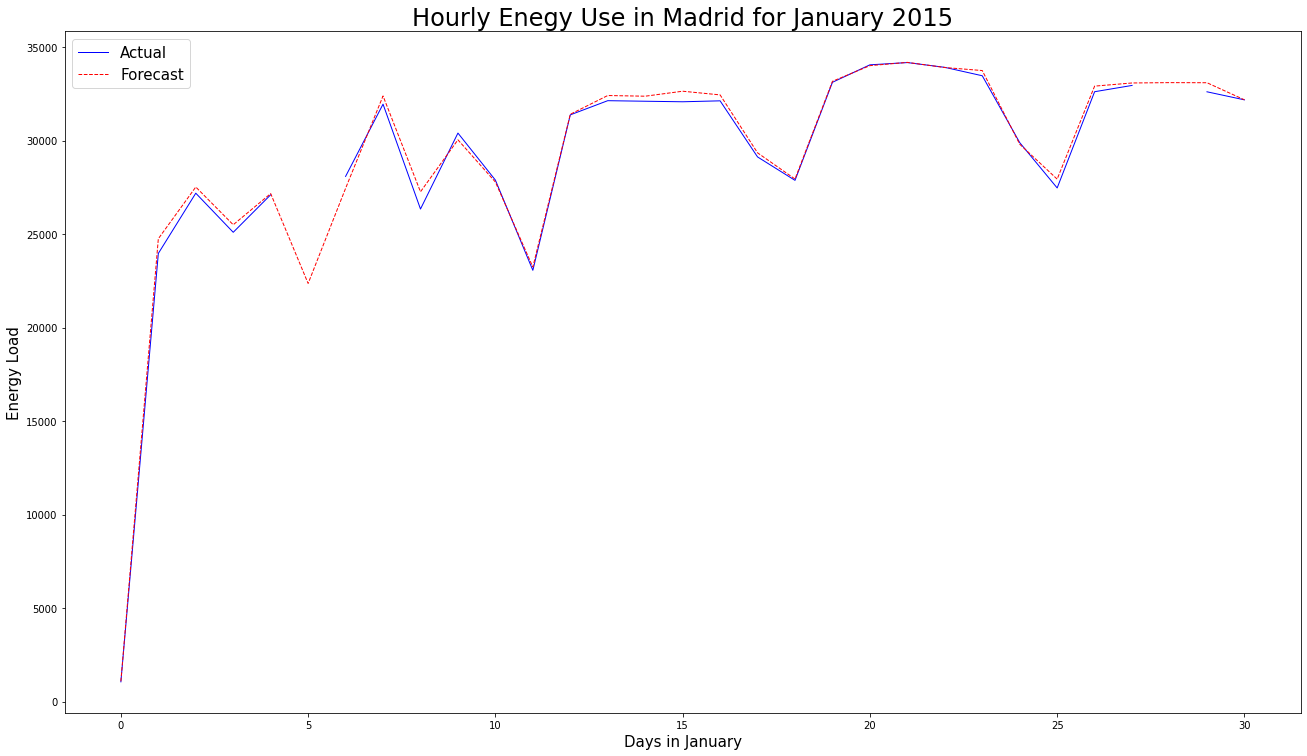

In [112]:
# Convert Hourly numbers to daily numbers from previous data.
madrid_daily_energy_actual = array('f')
madrid_daily_energy_forecast = array('f')

actual_sum = 0.0
forecast_sum = 0.0
counter = 0

# Loop through the range and sum up the hours in a day.
for i in range(len(madrid_january_energy)):
  actual_sum += madrid_january_energy[i]
  forecast_sum += madrid_january_forecast[i]
  if i % 24 == 0:
    madrid_daily_energy_actual.append(actual_sum / 24.0)
    madrid_daily_energy_forecast.append(forecast_sum / 24.0)
    counter += 1
    actual_sum = 0.0
    forecast_sum = 0.0

day_count = array('I')
for x in range(len(madrid_daily_energy_actual)):
  day_count.append(x)

plt.figure(figsize=(18,10))              ## Figure(figsize) changes the size of the output graph
plt.plot(day_count, madrid_daily_energy_actual, 'b-', linewidth=1, markersize=12, label='Actual')  ## Plot the actual energy use
plt.plot(day_count, madrid_daily_energy_forecast, 'r--', linewidth=1, markersize=12, label='Forecast')  ## Plot the forecast energy use
plt.tight_layout()
plt.title('Hourly Enegy Use in Madrid for January 2015', size=24)
plt.ylabel('Energy Load', size=15)
plt.xlabel('Days in January', size=15)
plt.legend(fontsize=15)
plt.show()  

<class 'numpy.float64'>


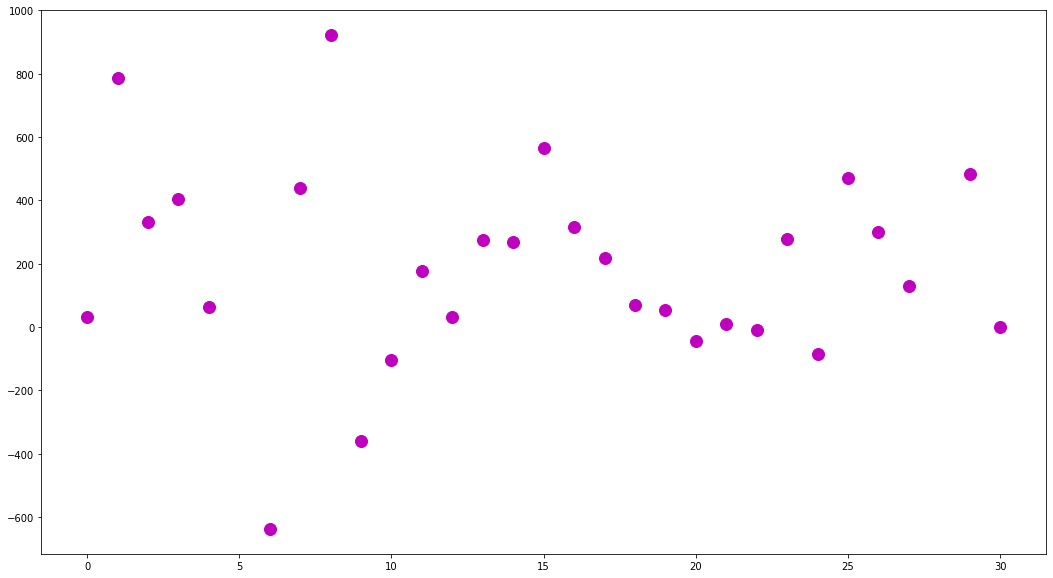

In [114]:
act_arr_daily = np.array(madrid_daily_energy_actual)
fore_arr_daily = np.array(madrid_daily_energy_forecast)

forecast_error_daily = np.subtract(fore_arr_daily, act_arr_daily)
plt.figure(figsize=(18,10))
plt.plot(day_count, forecast_error_daily, 'mo', linewidth=1, markersize=12, label='prediction')

print(type(forecast_error[0]))

Attempting a KNN analysis for correlations between pressure, humidity, and which class of weather_main is listed.  Just for fun, using April 2016 Seville data.  But first I'm just toying around attempting to find out which data will be the most useful.

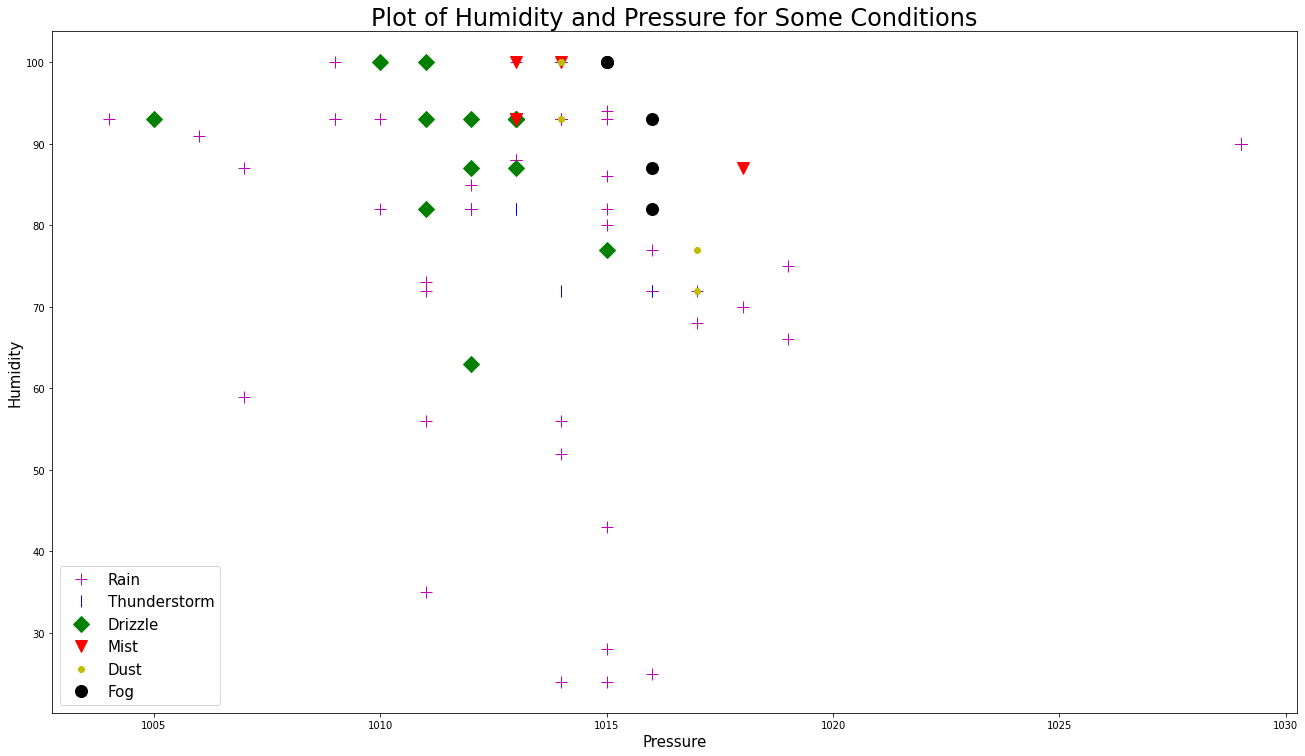

In [128]:
df_weather_main = df_energy_weather.select("pressure", "humidity", "weather_main") \
                                        .filter((df_w.city_name == 'Seville') \
                                        & (df_w.dt_iso.like('2016-04%')))


# Convert the data in the new DF to a list of pressure values when its 'clear'.
clear_pressure = list(df_weather_main.select('pressure') \
                                        .filter(df_w.weather_main == 'clear') \
                                        .toPandas()['pressure'])

# Convert the data in the new DF to a list of humidity values when its 'clear'.
clear_humidity = list(df_weather_main.select('humidity') \
                                        .filter(df_w.weather_main == 'clear') \
                                        .toPandas()['humidity'])

# Convert the data in the new DF to a list of pressure values when its 'clouds'.
cloudy_pressure = list(df_weather_main.select('pressure') \
                                        .filter(df_w.weather_main == 'clouds') \
                                        .toPandas()['pressure'])

# Convert the data in the new DF to a list of humidity values when its 'clouds'.
cloudy_humidity = list(df_weather_main.select('humidity') \
                                        .filter(df_w.weather_main == 'clouds') \
                                        .toPandas()['humidity'])

# Convert the data in the new DF to a list of pressure values when its 'rain'.
rain_pressure = list(df_weather_main.select('pressure') \
                                        .filter(df_w.weather_main == 'rain') \
                                        .toPandas()['pressure'])

# Convert the data in the new DF to a list of humidity values when its 'rain'.
rain_humidity = list(df_weather_main.select('humidity') \
                                        .filter(df_w.weather_main == 'rain') \
                                        .toPandas()['humidity'])

# Convert the data in the new DF to a list of pressure values when its 'thunderstorm'.
thunderstorm_pressure = list(df_weather_main.select('pressure') \
                                        .filter(df_w.weather_main == 'thunderstorm') \
                                        .toPandas()['pressure'])

# Convert the data in the new DF to a list of humidity values when its 'thunderstorm'.
thunderstorm_humidity = list(df_weather_main.select('humidity') \
                                        .filter(df_w.weather_main == 'thunderstorm') \
                                        .toPandas()['humidity'])

# Convert the data in the new DF to a list of pressure values when its 'mist'.
mist_pressure = list(df_weather_main.select('pressure') \
                                        .filter(df_w.weather_main == 'mist') \
                                        .toPandas()['pressure'])

# Convert the data in the new DF to a list of humidity values when its 'mist'.
mist_humidity = list(df_weather_main.select('humidity') \
                                        .filter(df_w.weather_main == 'mist') \
                                        .toPandas()['humidity'])

# Convert the data in the new DF to a list of pressure values when its 'drizzle'.
drizzle_pressure = list(df_weather_main.select('pressure') \
                                        .filter(df_w.weather_main == 'drizzle') \
                                        .toPandas()['pressure'])

# Convert the data in the new DF to a list of humidity values when its 'drizzle'.
drizzle_humidity = list(df_weather_main.select('humidity') \
                                        .filter(df_w.weather_main == 'drizzle') \
                                        .toPandas()['humidity'])

# Convert the data in the new DF to a list of pressure values when its 'dust'.
dust_pressure = list(df_weather_main.select('pressure') \
                                        .filter(df_w.weather_main == 'dust') \
                                        .toPandas()['pressure'])

# Convert the data in the new DF to a list of humidity values when its 'dust'.
dust_humidity = list(df_weather_main.select('humidity') \
                                        .filter(df_w.weather_main == 'dust') \
                                        .toPandas()['humidity'])

# Convert the data in the new DF to a list of pressure values when its 'fog'.
fog_pressure = list(df_weather_main.select('pressure') \
                                        .filter(df_w.weather_main == 'fog') \
                                        .toPandas()['pressure'])

# Convert the data in the new DF to a list of humidity values when its 'fog'.
fog_humidity = list(df_weather_main.select('humidity') \
                                        .filter(df_w.weather_main == 'fog') \
                                        .toPandas()['humidity'])

plt.figure(figsize=(18,10))              ## Figure(figsize) changes the size of the output graph
#plt.plot(clear_pressure, clear_humidity, 'bx', linewidth=1, markersize=12, label='Clear')
plt.plot(rain_pressure, rain_humidity, 'm+', linewidth=1, markersize=12, label='Rain')
plt.plot(thunderstorm_pressure, thunderstorm_humidity, 'b|', linewidth=1, markersize=12, label='Thunderstorm')
plt.plot(drizzle_pressure, drizzle_humidity, 'gD', linewidth=1, markersize=12, label='Drizzle')
plt.plot(mist_pressure, mist_humidity, 'rv', linewidth=1, markersize=12, label='Mist')
plt.plot(dust_pressure, dust_humidity, 'y.', linewidth=1, markersize=12, label='Dust')
plt.plot(fog_pressure, fog_humidity, 'ko', linewidth=1, markersize=12, label='Fog')
#plt.plot(cloudy_pressure, cloudy_humidity, 'cd', linewidth=1, markersize=12, label='Cloudy')
plt.tight_layout()
plt.title('Plot of Humidity and Pressure for Some Conditions', size=24)
plt.ylabel('Humidity', size=15)
plt.xlabel('Pressure', size=15)
plt.legend(fontsize=15)
plt.show()

In [124]:
print(len(rain_humidity))
print(len(clear_humidity))
print(len(cloudy_humidity))
print(len(rain_humidity)+len(cloudy_humidity)+len(clear_humidity))

73
351
272
696
